In [1]:
if("ggplot2" %in% rownames(installed.packages())==FALSE) {install.packages("ggplot2")}
library(ggplot2)

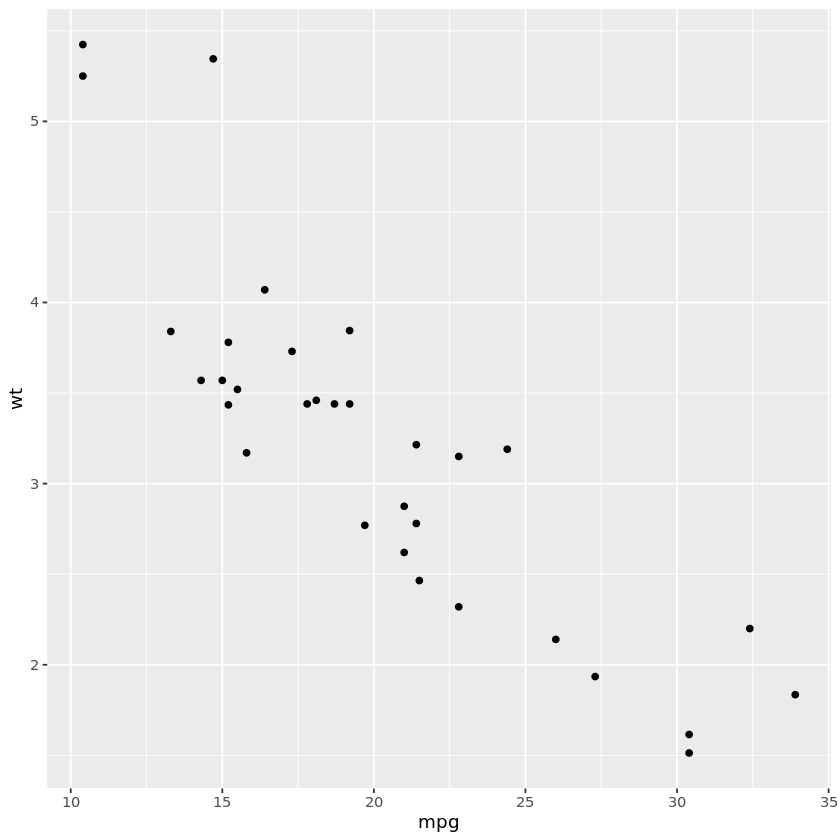

In [2]:
#2 variables as parameter-scatter plot-default
qplot(mpg,wt,data=mtcars)

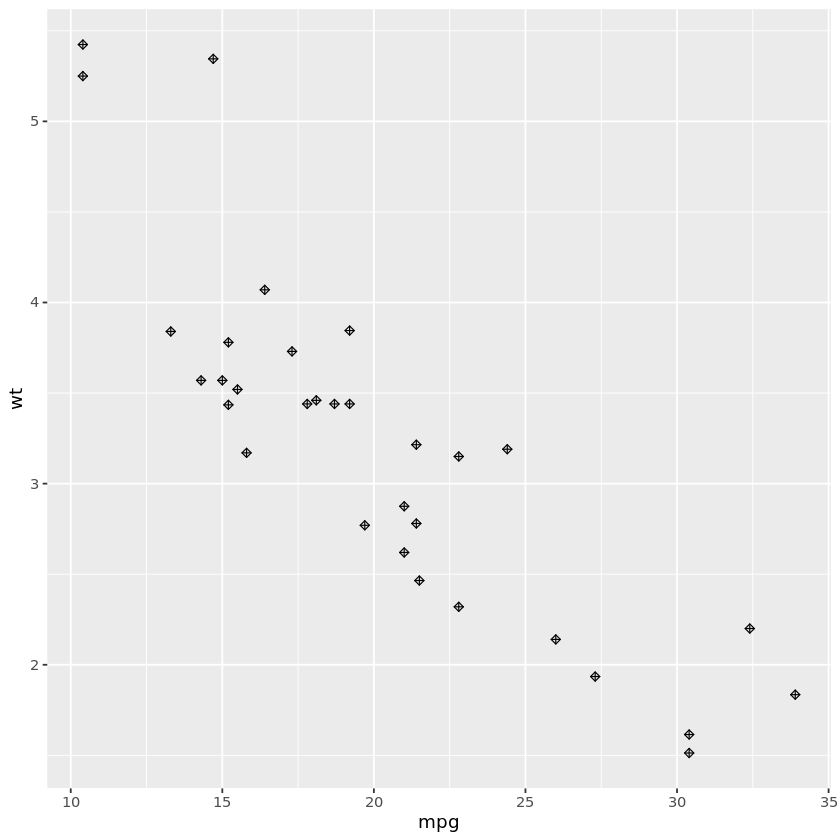

In [13]:
ggplot(mtcars,aes(x=mpg,y=wt))+geom_point(shape=9)+scale_shape_identity()

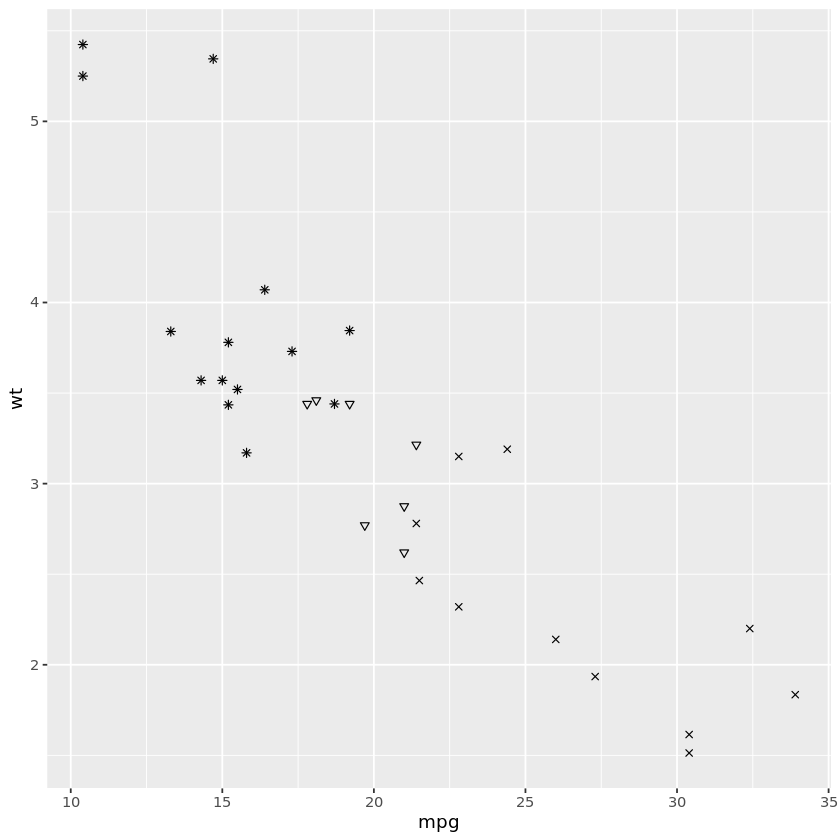

In [14]:
ggplot(mtcars,aes(x=mpg,y=wt,shape=cyl))+geom_point()+scale_shape_identity()

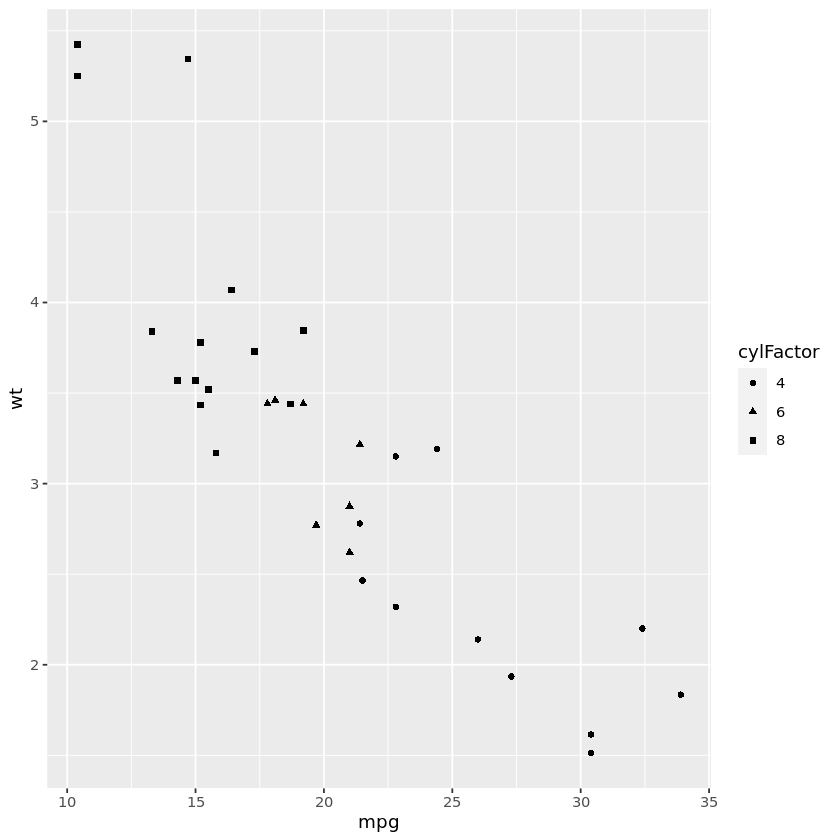

In [16]:
mtcars$cylFactor<-factor(mtcars$cyl)
ggplot(mtcars,aes(x=mpg,y=wt,shape=cylFactor))+geom_point()

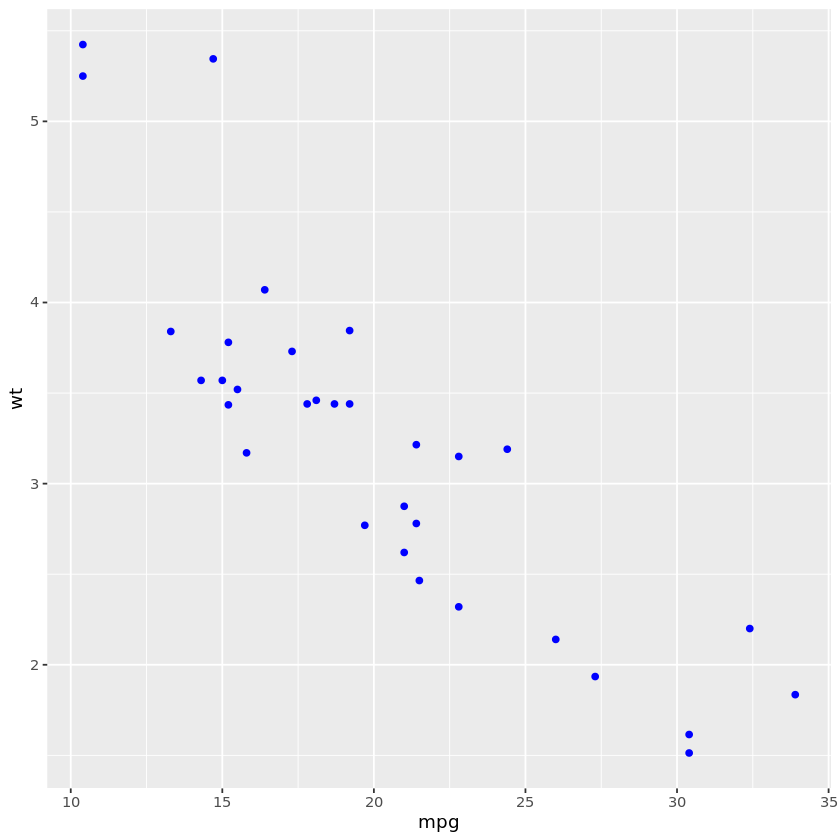

In [17]:
ggplot(mtcars,aes(x=mpg,y=wt))+geom_point(shape=19,color="blue")

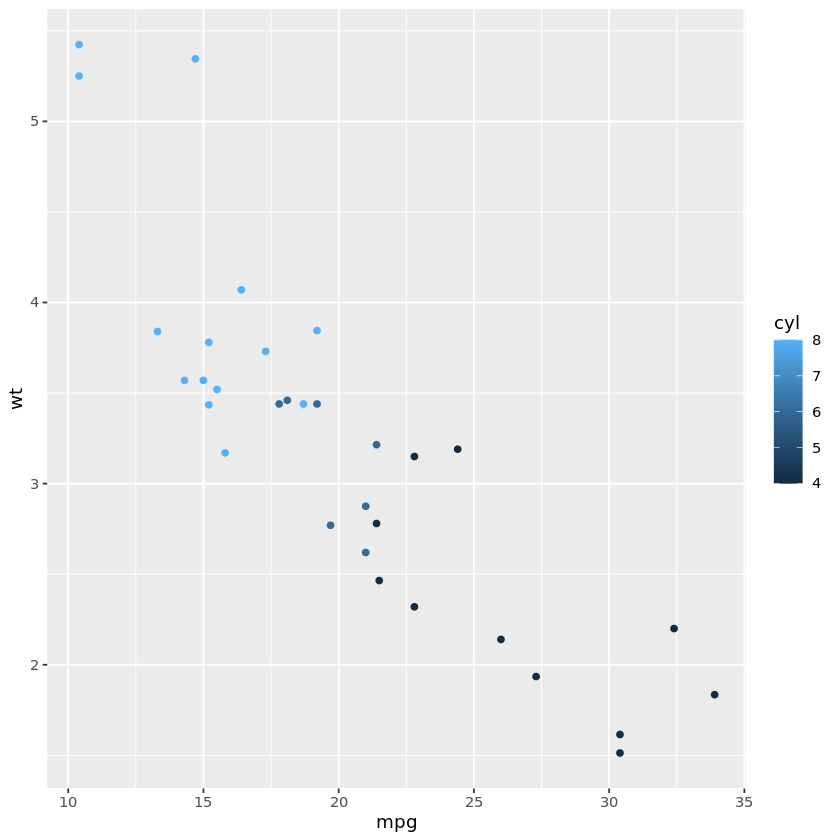

In [18]:
ggplot(mtcars,aes(x=mpg,y=wt,color=cyl))+geom_point(shape=19)

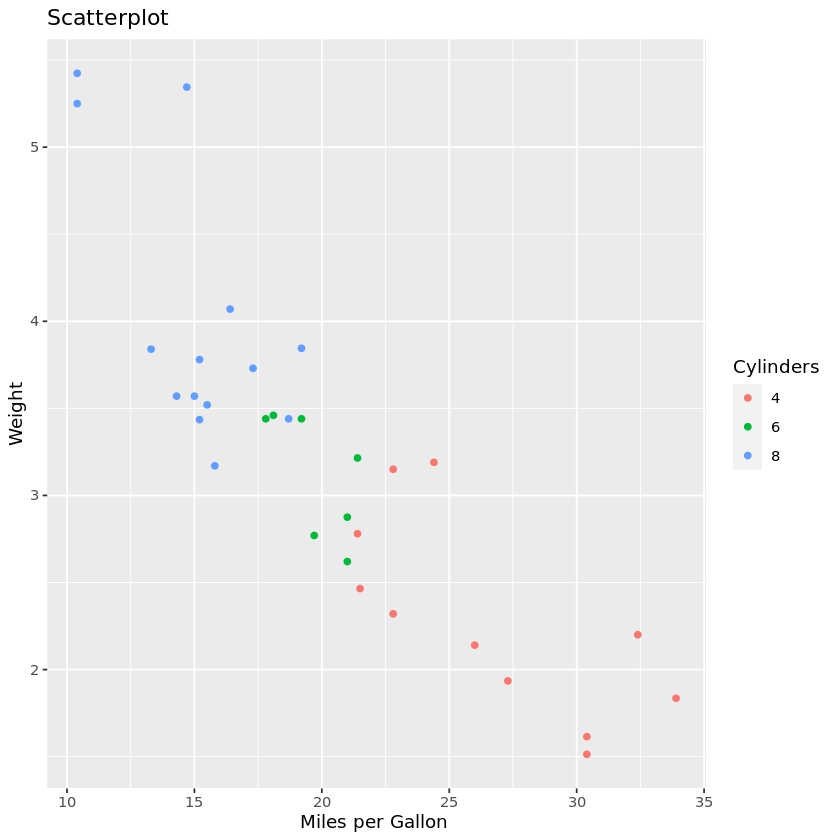

In [19]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + xlab("Miles per Gallon ") + ylab("Weight") +
  labs(colour = "Cylinders") + ggtitle("Scatterplot")

In [20]:
#line graph

In [21]:
?EuStockMarkets

EuStockMarkets {datasets},R Documentation


In [22]:
#ggplots doesnt work with matrices(mts),we create a dataframe from this matrix


In [23]:
stockDF<-as.data.frame(EuStockMarkets)

In [24]:
head(stockDF)

,DAX,SMI,CAC,FTSE
,<dbl>,<dbl>,<dbl>,<dbl>
1,1628.75,1678.1,1772.8,2443.6
2,1613.63,1688.5,1750.5,2460.2
3,1606.51,1678.6,1718.0,2448.2
4,1621.04,1684.1,1708.1,2470.4
5,1618.16,1686.6,1723.1,2484.7
6,1610.61,1671.6,1714.3,2466.8


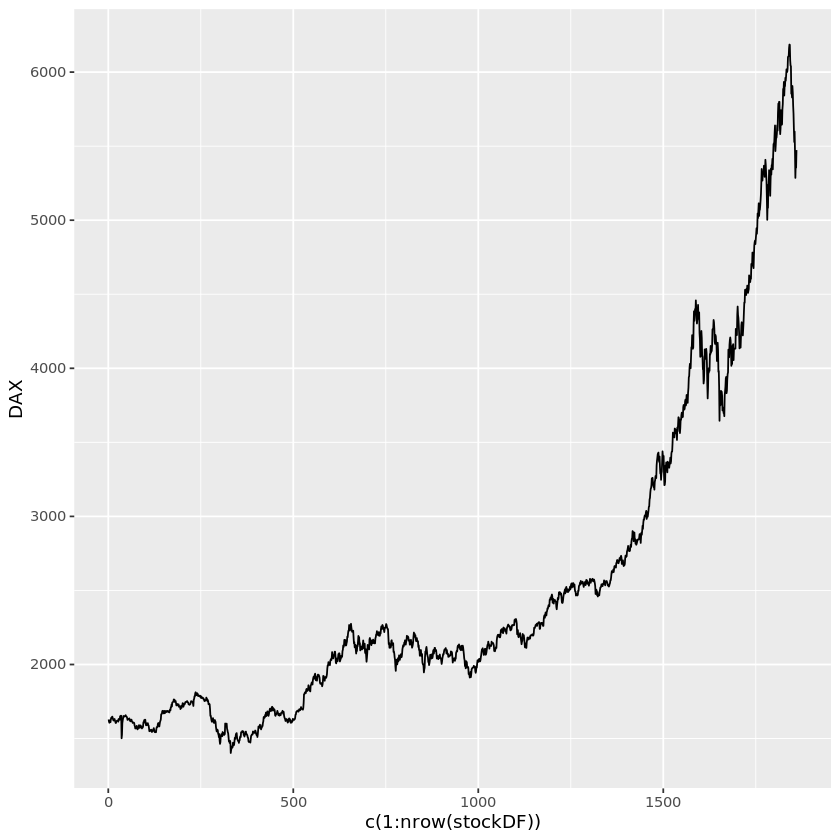

In [27]:
ggplot(stockDF,aes(x=c(1:nrow(stockDF)),y=DAX))+geom_line()

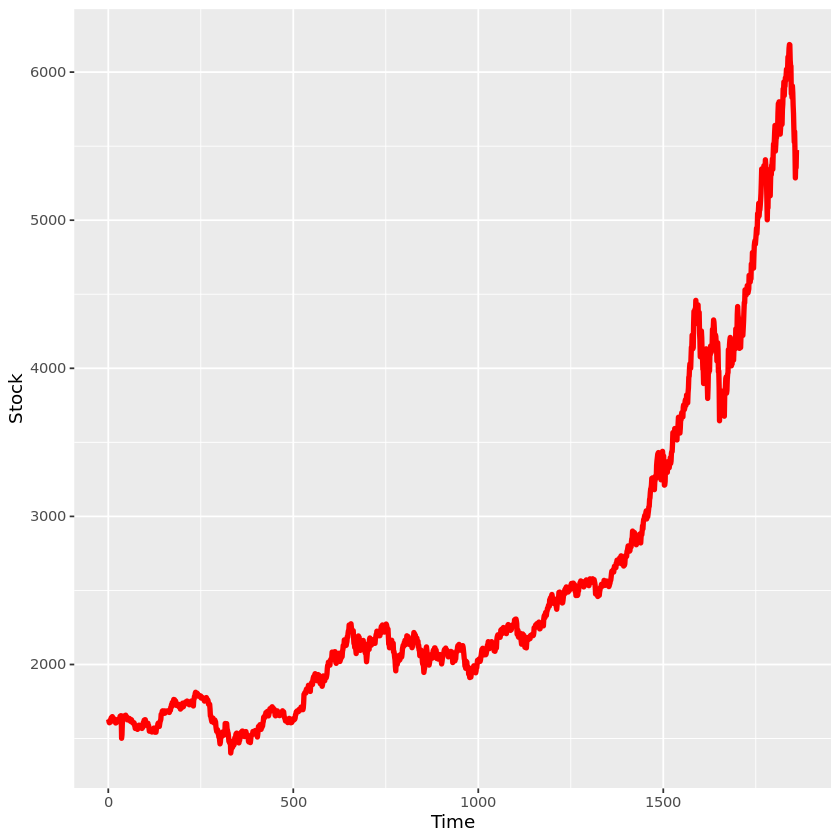

In [29]:
#to inc width of line
ggplot(stockDF,aes(x=c(1:nrow(stockDF)),y=DAX))+geom_line(size=1.5,color="red")+labs(x="Time",y="Stock")

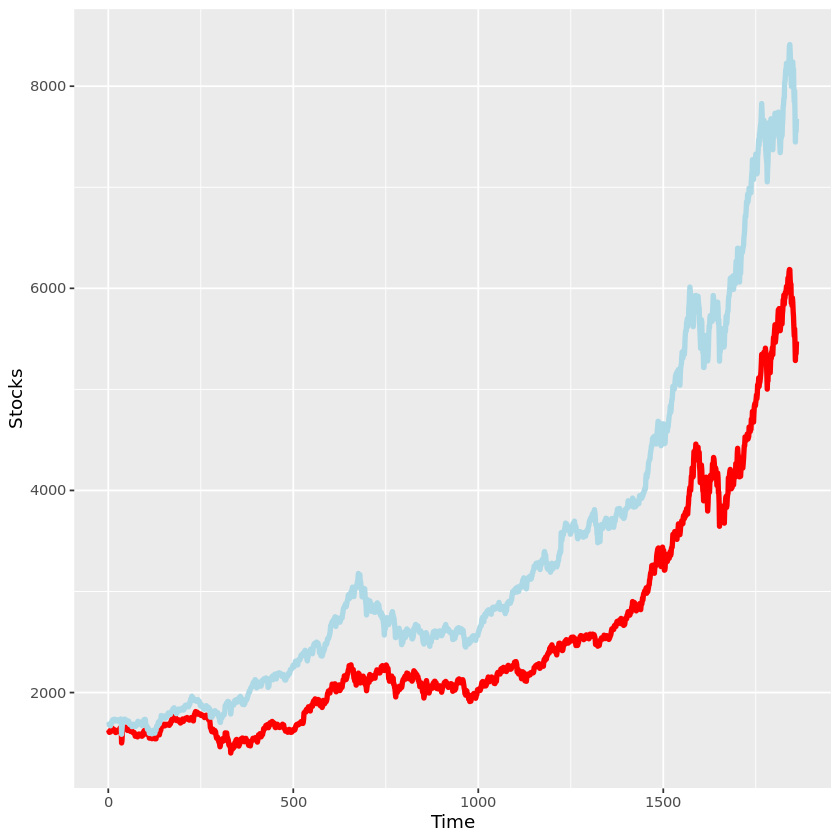

In [31]:
dax_smi_plot<-ggplot()+geom_line(data=stockDF,aes(x=c(1:nrow(stockDF)),y=DAX),size=1.5,color="red")+geom_line(data=stockDF,aes(x=c(1:nrow(stockDF)),y=SMI),size=1.5,color="light blue")+labs(x="Time",y="Stocks")
print(dax_smi_plot)

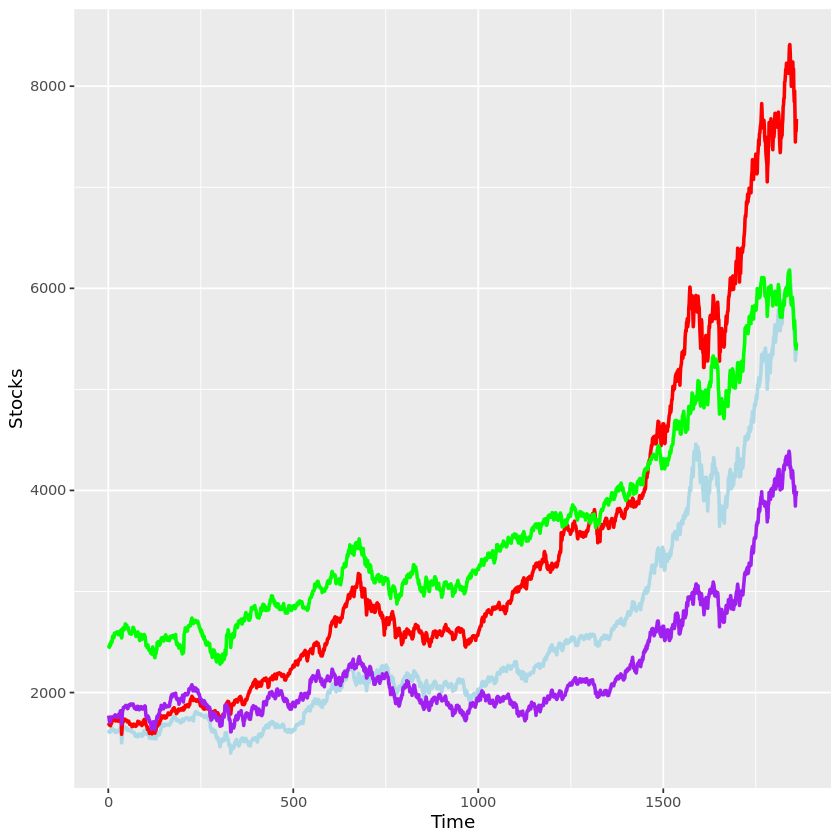

In [33]:
all_stocks <- ggplot() +
  geom_line(data =stockDF,aes(x=c(1:nrow(stockDF)), y = DAX), size=1, colour="light blue") +
  geom_line(data = stockDF,aes(x=c(1:nrow(stockDF)), y = SMI), size =1, colour = "red") + 
  geom_line(data = stockDF,aes(x=c(1:nrow(stockDF)), y = CAC), size =1, colour = "purple") + 
  geom_line(data = stockDF,aes(x=c(1:nrow(stockDF)), y = FTSE), size =1, colour = "green") +
  labs(x = "Time", y = "Stocks")
print(all_stocks)

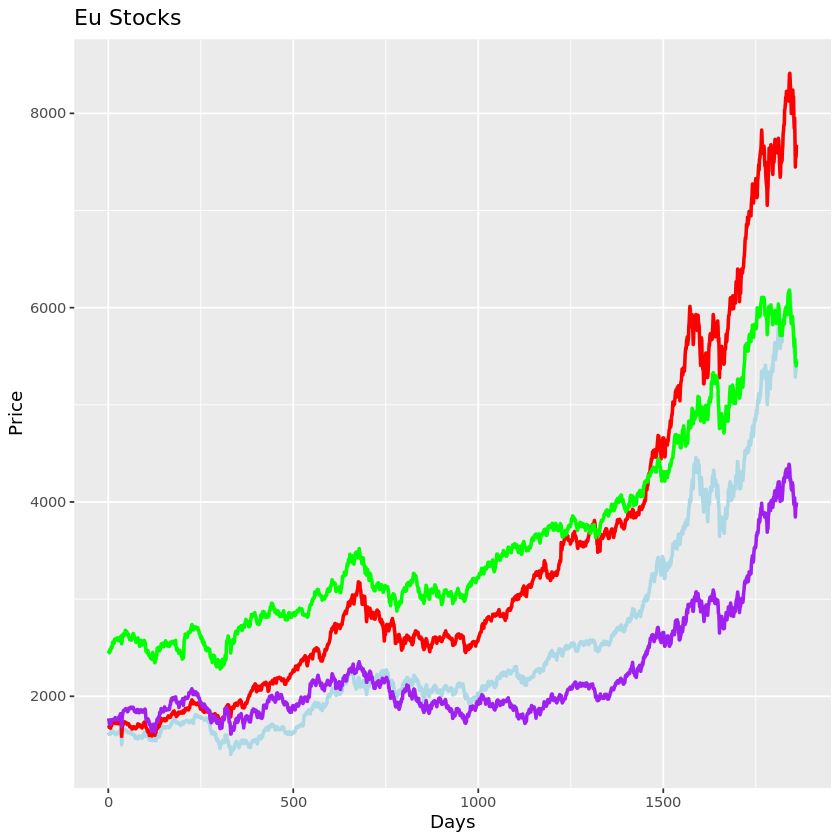

In [34]:
legend_stocks <- all_stocks + xlab("Days") + ylab("Price") + ggtitle("Eu Stocks")
print(legend_stocks)

In [35]:
#regression

`geom_smooth()` using formula 'y ~ x'


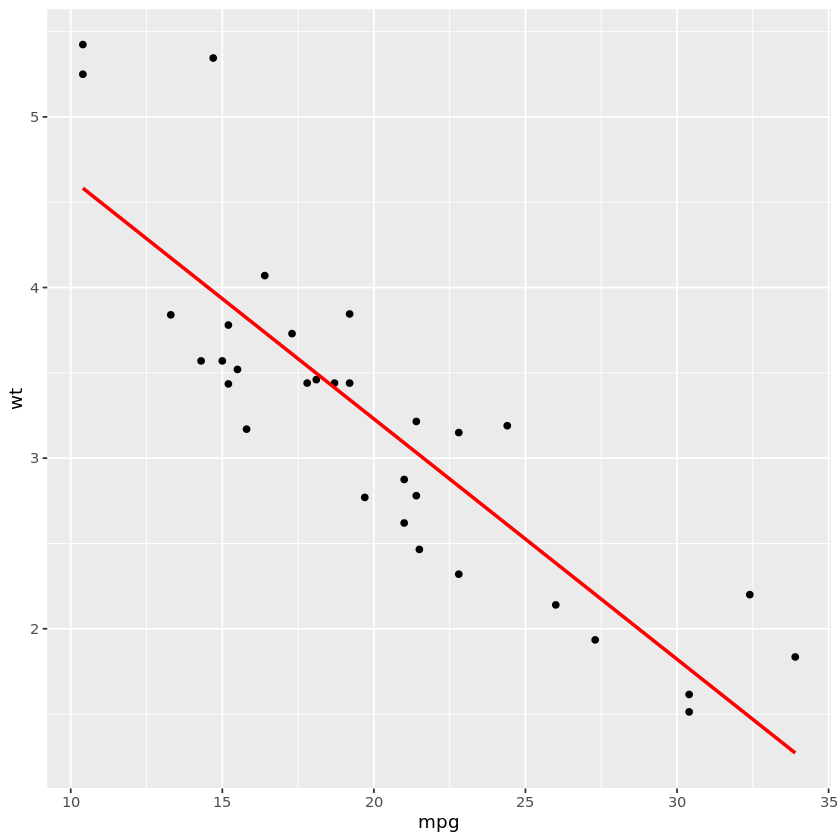

In [36]:
#method = "lm" specifies that the smoothing method should be linear regression (least squares line).se = FALSE indicates that the standard error (confidence interval) around the regression line should not be displayed.
ggplot(mtcars,aes(x=mpg,y=wt))  + geom_point(shape=19) +
  geom_smooth(method="lm", se= FALSE, color = "red")

`geom_smooth()` using formula 'y ~ x'


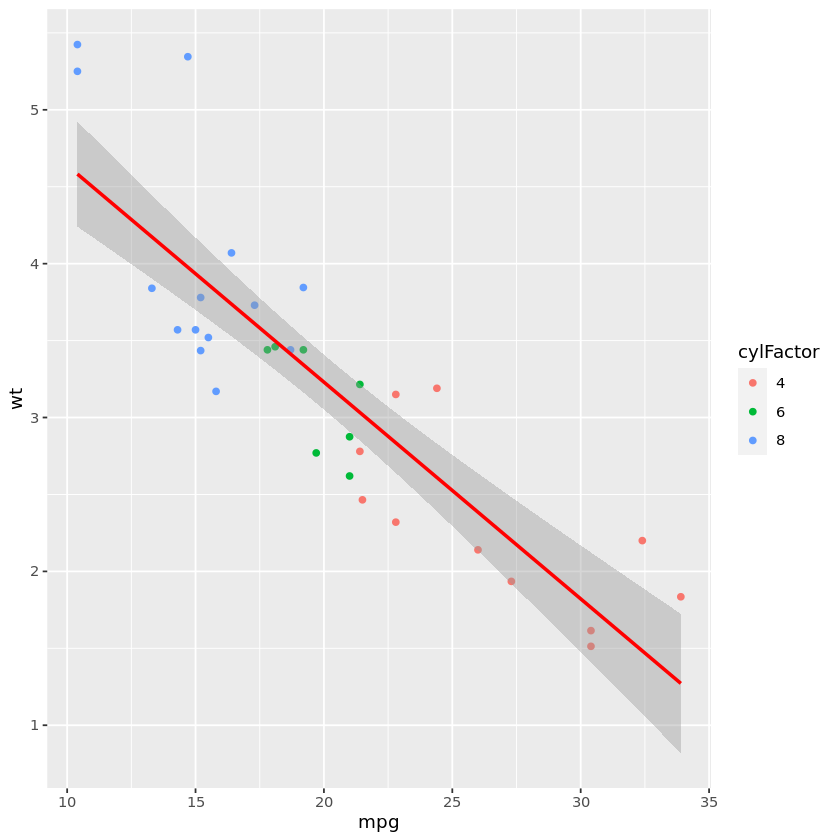

In [37]:
#se = TRUE  -> confidence interval appear (default = true)
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + geom_smooth(method="lm", se= TRUE, color = "red")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


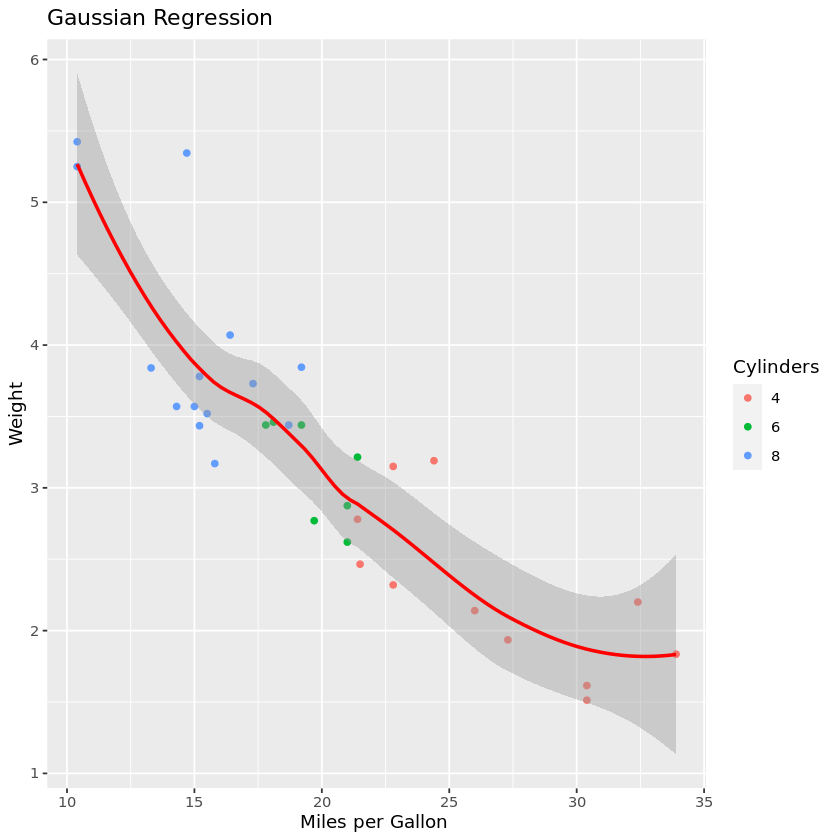

In [38]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + 
  geom_smooth(method="auto", se= TRUE, color = "red") + xlab("Miles per Gallon ") + 
  ylab("Weight") +  labs(colour = "Cylinders") + ggtitle("Gaussian Regression")